# Survival Analysis with Python


**lifelines** is a complete survival analysis library, written in pure Python. What benefits does lifelines have?

- easy installation
- internal plotting methods
- simple and intuitive API
- handles right, left and interval censored data
- contains the most popular parametric, semi-parametric and non-parametric models


https://lifelines.readthedocs.io/

```
pip install lifelines
```

Cheibub, José Antonio, Jennifer Gandhi, and James Raymond Vreeland. 2010. “Democracy and Dictatorship Revisited.” Public Choice, vol. 143, no. 2-1, pp. 67-101.

In [86]:
from lifelines.datasets import load_dd

data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [5]:
data['regime'].unique()

array(['Monarchy', 'Civilian Dict', 'Military Dict', 'Parliamentary Dem',
       'Presidential Dem', 'Mixed Dem'], dtype=object)

In [15]:
data['democracy'].unique()

array(['Non-democracy', 'Democracy'], dtype=object)

In [58]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [59]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

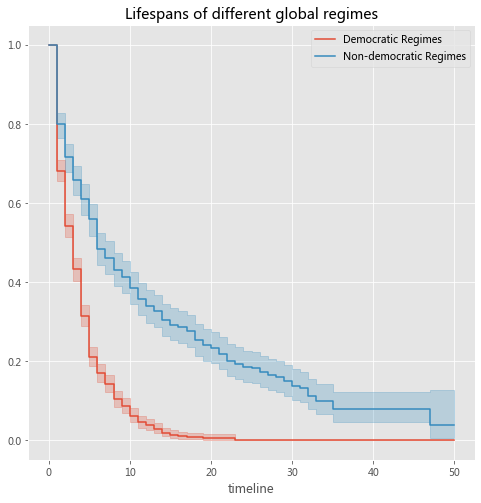

In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (8, 8))

ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");

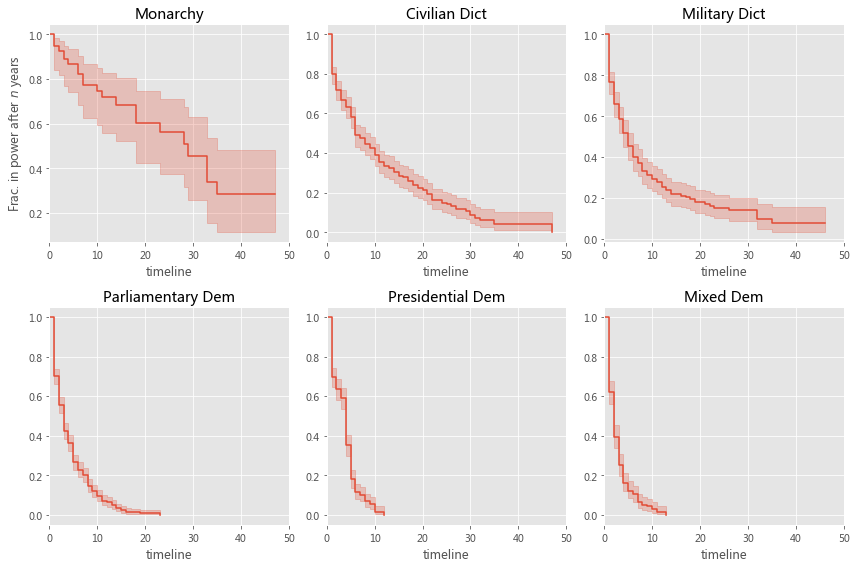

In [61]:
regime_types = data['regime'].unique()
plt.figure(figsize = (12, 8))


for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()

In [62]:
data['un_continent_name'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [87]:
import pandas as pd
df = pd.get_dummies(data['regime'])
df.head()

,Civilian Dict,Military Dict,Mixed Dem,Monarchy,Parliamentary Dem,Presidential Dem
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [88]:
data = pd.concat([data, df], axis=1)
data

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed,Civilian Dict,Military Dict,Mixed Dem,Monarchy,Parliamentary Dem,Presidential Dem
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1,0,0,0,1,0,0
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1,1,0,0,0,0,0
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1,0,0,0,1,0,0
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0,1,0,0,0,0,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,Zambia,551,551.0,Eastern Africa,Africa,Levy Patrick Mwanawasa,Levy Patrick Mwanawasa.Zambia.2002.2007.Civili...,Non-democracy,Civilian Dict,2002,6,1,1,0,0,0,0,0
1804,Zambia,551,551.0,Eastern Africa,Africa,Rupiah Bwezani Banda,Rupiah Bwezani Banda.Zambia.2008.2008.Civilian...,Non-democracy,Civilian Dict,2008,1,0,1,0,0,0,0,0
1805,Zimbabwe,552,552.0,Eastern Africa,Africa,Ian Smith,Ian Smith.Zimbabwe.1965.1978.Civilian Dict,Non-democracy,Civilian Dict,1965,14,1,1,0,0,0,0,0
1806,Zimbabwe,552,552.0,Eastern Africa,Africa,Abel Muzorewa,Abel Muzorewa.Zimbabwe.1979.1979.Civilian Dict,Non-democracy,Civilian Dict,1979,1,1,1,0,0,0,0,0


In [89]:
data.columns

Index(['ctryname', 'cowcode2', 'politycode', 'un_region_name',
       'un_continent_name', 'ehead', 'leaderspellreg', 'democracy', 'regime',
       'start_year', 'duration', 'observed', 'Civilian Dict', 'Military Dict',
       'Mixed Dem', 'Monarchy', 'Parliamentary Dem', 'Presidential Dem'],
      dtype='object')

In [90]:
data['Democracy'] = [1  if i == 'Democracy' else 0 for i in data['democracy']]

In [91]:
from lifelines import CoxPHFitter

cph0 = CoxPHFitter()

dat = data[['duration', 'observed', 'start_year','Democracy']]

cph0.fit(dat, duration_col='duration', event_col='observed')

cph0.print_summary() 

<lifelines.CoxPHFitter: fitted with 1808 total observations, 340 right-censored observations>
             duration col = 'duration'
                event col = 'observed'
      baseline estimation = breslow
   number of observations = 1808
number of events observed = 1468
   partial log-likelihood = -9613.93
         time fit was run = 2021-06-11 03:48:19 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
start_year  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Democracy    0.97       2.65       0.06             0.85             1.10                 2.34                 3.00

               z      p   -log2(p)
covariate                         
start_year -0.82   0.41       1.28
Democracy  15.27 <0.005     172.57
---
Concordance = 0.60
Partial AIC = 19231.86
log-likelihood ratio test = 264.70 on 2 df
-log2(p) of ll-ratio test = 190.94

In [82]:
dat = data[['duration', 'observed', 'start_year',
     'Civilian Dict', 'Military Dict', #'Monarchy',
       'Mixed Dem',  'Parliamentary Dem', 'Presidential Dem'
]]

from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(dat, duration_col='duration', event_col='observed')

cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 1808 total observations, 340 right-censored observations>
             duration col = 'duration'
                event col = 'observed'
      baseline estimation = breslow
   number of observations = 1808
number of events observed = 1468
   partial log-likelihood = -9576.63
         time fit was run = 2021-06-11 03:44:58 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
start_year         -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
Civilian Dict       1.12       3.05       0.22             0.68             1.56                 1.97                 4.74
Military Dict       1.29       3.63       0.23             0.84             1.73                 2.32                 5.66
Mixed Dem           2.43      11.38       0.23             1.98             2.88                 7.26                17.85
Parliamentary Dem   1.98       7.26       0.22             1.55             2.42                 4.69                11.23
Presidential Dem    2.06       7.84       0.23             1.61             2.50                 5.02                12.24

                      z      p   -log2(p)
covariate                                
start_year        -1.81   0.07       3.83
Civilian Dict      4.97 <0.005      20.52
Military Dict      5.67 <0.005      26.05
Mixed Dem         10.60 <0.005      84.73
Parliamentary Dem  8.91 <0.005      60.73
Presidential Dem   9.06 <0.005      62.68
---
Concordance = 0.63
Partial AIC = 19165.27
log-likelihood ratio test = 339.29 on 6 df
-log2(p) of ll-ratio test = 230.92

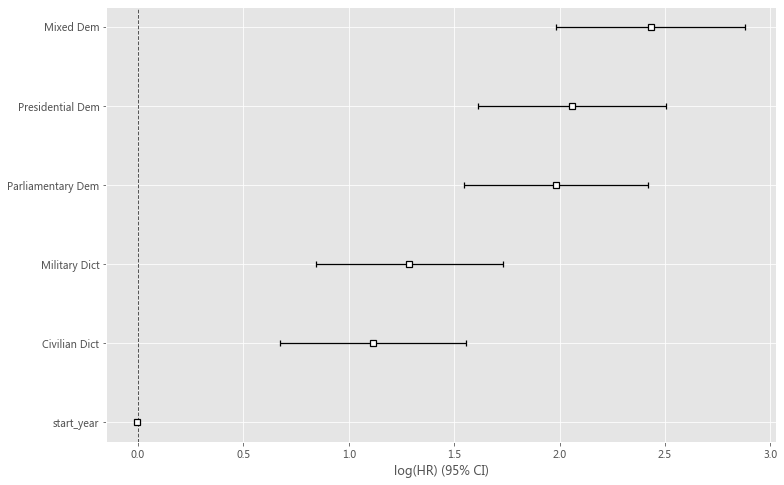

In [84]:
plt.figure(figsize = (12, 8))
cph.plot()
plt.show()


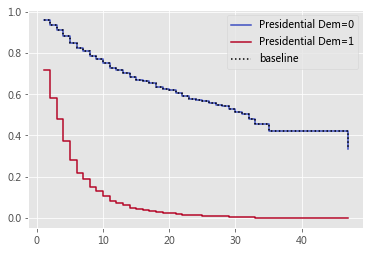

In [85]:
cph.plot_partial_effects_on_outcome(covariates='Presidential Dem', values=[0, 1], cmap='coolwarm');